In [14]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [15]:
# Load the dataset
df = pd.read_csv('Unemployment in India.csv')


In [16]:
# Clean column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [17]:
# Basic info about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

Missing values in each column:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment 

In [18]:
# Drop missing values (optional but useful for visualization)
df.dropna(inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Rename columns for easier access
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

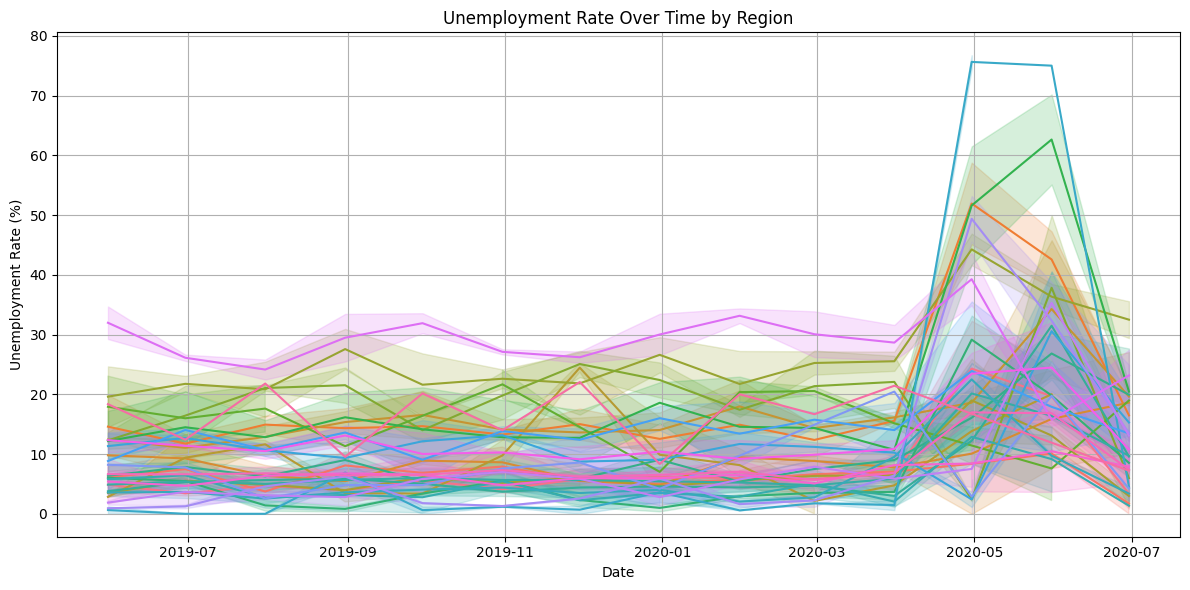

In [19]:
# ------------------------------------------
# 📊 Unemployment Rate Over Time (All India)
# ------------------------------------------
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='Region', legend=False)
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-20-3b2513c01817>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unemp.values, y=avg_unemp.index, palette='viridis')


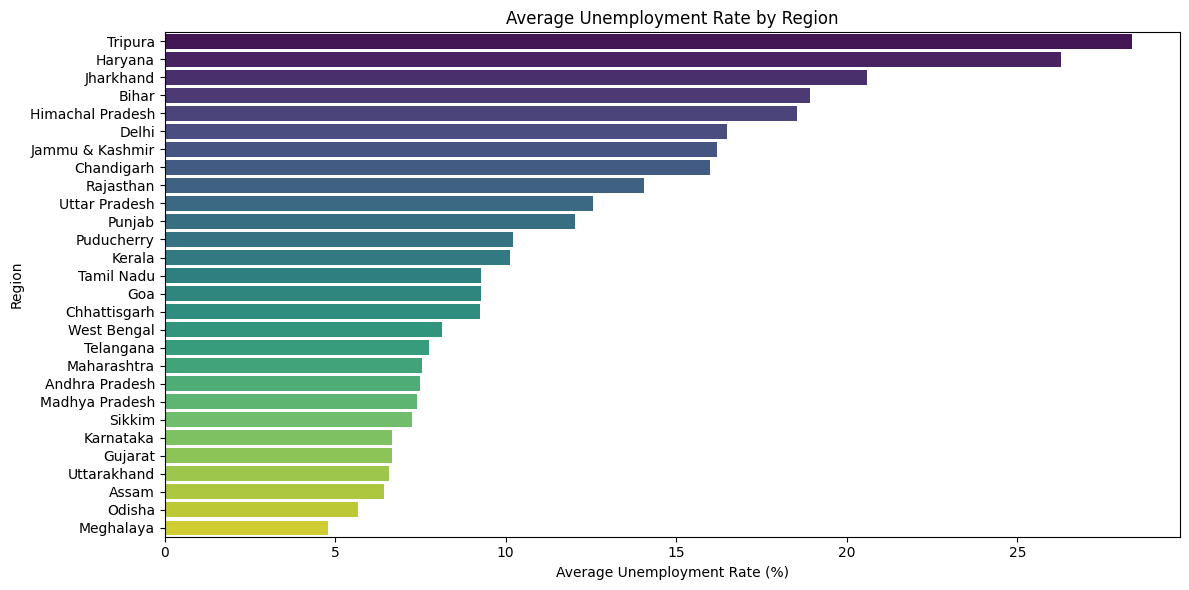

In [20]:
# ------------------------------------------
# 📈 Average Unemployment Rate by Region
# ------------------------------------------
plt.figure(figsize=(12, 6))
avg_unemp = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=avg_unemp.values, y=avg_unemp.index, palette='viridis')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

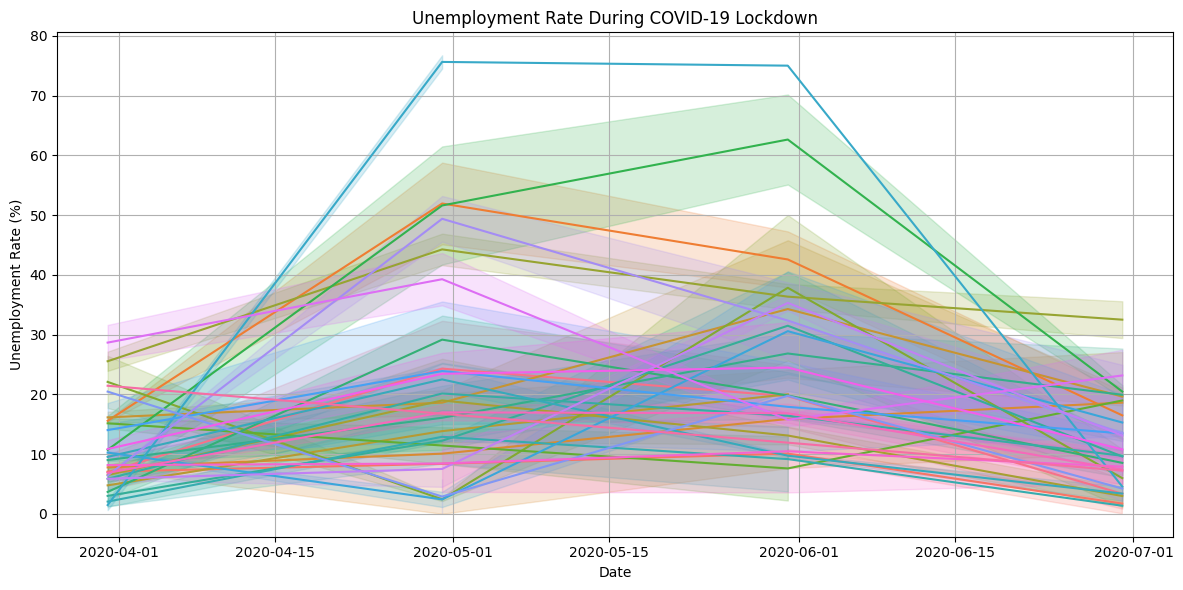

In [21]:
# ------------------------------------------
# 📉 Unemployment Rate During Peak COVID-19
# ------------------------------------------
covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-09-30')]
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_period, x='Date', y='Unemployment_Rate', hue='Region', legend=False)
plt.title('Unemployment Rate During COVID-19 Lockdown')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

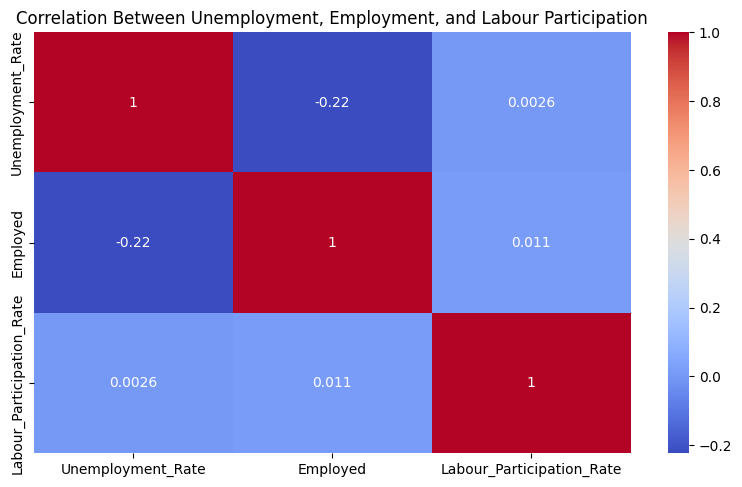

In [22]:
# ------------------------------------------
# 🧮 Correlation Heatmap
# ------------------------------------------
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Unemployment, Employment, and Labour Participation')
plt.tight_layout()
plt.show()